In [1]:
import pandas as pd
import numpy as np
import warnings

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
from scipy import misc

%matplotlib inline

<h1>Análise de Dados dos Atributos das Músicas do Spotify</h1>

In [2]:
data = pd.read_csv('data/data.csv')

In [3]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [4]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [6]:
train, test = train_test_split(data, test_size = 0.15)

In [7]:
print("Tamanho para treinamento: {}; Tamanho para teste: {};".format(len(train), len(test)))

Tamanho para treinamento: 1714; Tamanho para teste: 303;


In [8]:
# linhas colunas
train.shape

(1714, 17)

In [9]:
# Custom Color Palette
red_blue = ["#19B5FE", "#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

In [10]:
pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']

pos_acousticness = data[data['target'] == 1]['acousticness']
neg_acousticness = data[data['target'] == 0]['acousticness'] 

pos_danceability = data[data['target'] == 1]['danceability']
neg_danceability = data[data['target'] == 0]['danceability'] 

pos_duration_ms = data[data['target'] == 1]['duration_ms']
neg_duration_ms = data[data['target'] == 0]['duration_ms']   

pos_energy = data[data['target'] == 1]['energy']
neg_energy = data[data['target'] == 0]['energy'] 

pos_instrumentalness = data[data['target'] == 1]['instrumentalness']
neg_instrumentalness = data[data['target'] == 0]['instrumentalness'] 

pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']

pos_liveness = data[data['target'] == 1]['liveness']
neg_liveness = data[data['target'] == 0]['liveness']

pos_loudness = data[data['target'] == 1]['loudness']
neg_loudness = data[data['target'] == 0]['loudness']  

pos_mode = data[data['target'] == 1]['mode']
neg_mode = data[data['target'] == 0]['mode']

pos_speechiness = data[data['target'] == 1]['speechiness']
neg_speechiness = data[data['target'] == 0]['speechiness'] 

pos_time_signature = data[data['target'] == 1]['time_signature']
neg_time_signature = data[data['target'] == 0]['time_signature']

pos_valence = data[data['target'] == 1]['valence']
neg_valence = data[data['target'] == 0]['valence'] 

pos_target = data[data['target'] == 1]['target']
neg_target = data[data['target'] == 0]['target']      

pos_song_title = data[data['target'] == 1]['song_title']
neg_song_title = data[data['target'] == 0]['song_title'] 

pos_artist = data[data['target'] == 1]['artist']
neg_artist = data[data['target'] == 0]['artist']

<h1>Gráficos sobre Distribuição dos Likes</h1>

<p><a href="https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/">Mais informações sobre os atributos das músicas</a><p>

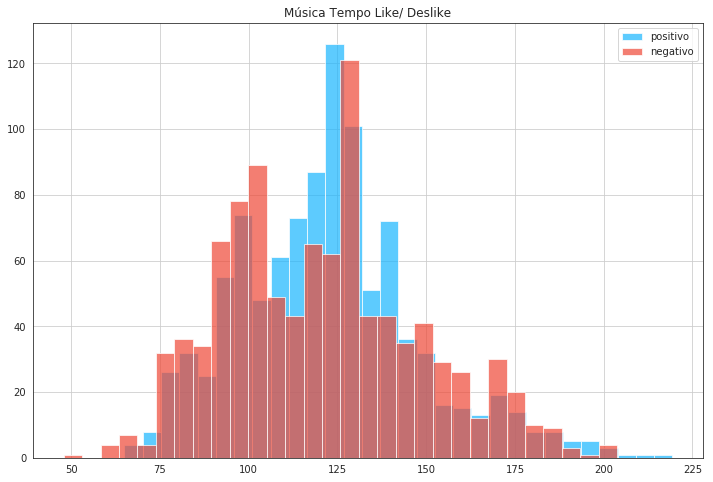

In [11]:
fig = plt.figure(figsize=(12, 8))
plt.title("Música Tempo Like/ Deslike")
pos_tempo.hist(alpha = 0.7, bins = 30, label="positivo")
neg_tempo.hist(alpha = 0.7, bins = 30, label="negativo")
plt.legend(loc="upper right")

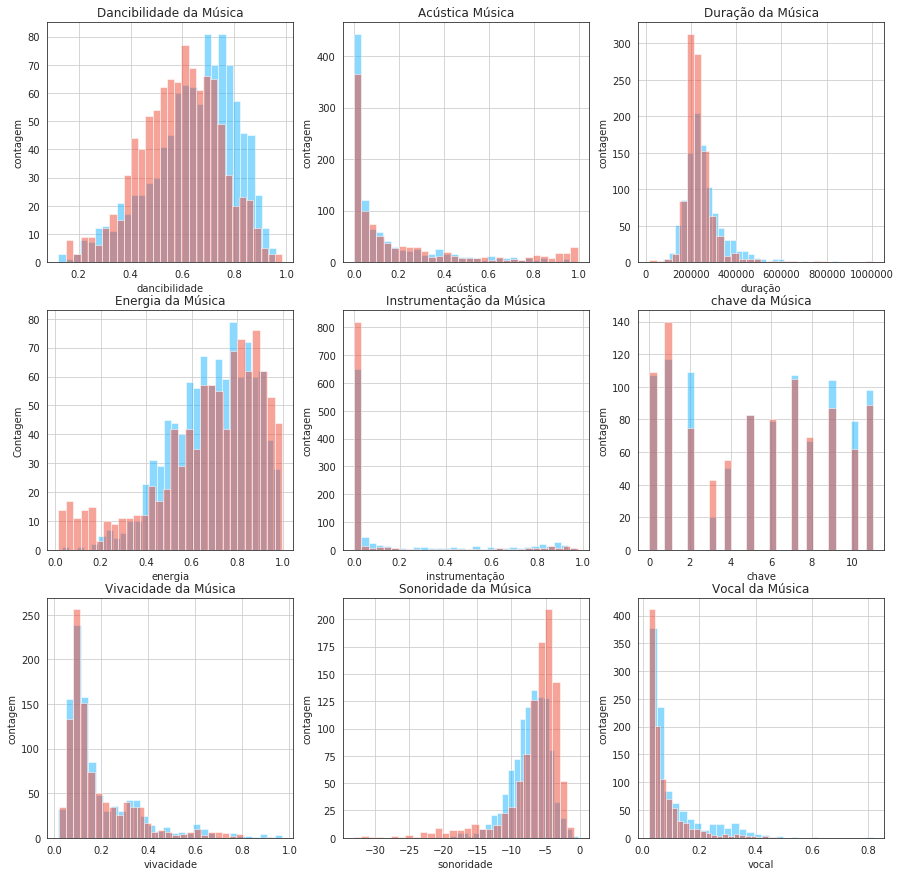

In [12]:
warnings.filterwarnings('ignore')
fig2 = plt.figure(figsize=(15,15))

#Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('dancibilidade')
ax3.set_ylabel('contagem')
ax3.set_title('Dancibilidade da Música')
pos_danceability.hist(alpha = 0.5, bins=30)
ax4 = fig2.add_subplot(331)
neg_danceability.hist(alpha = 0.5, bins=30)

ax5 = fig2.add_subplot(332)
ax5.set_xlabel('acústica')
ax5.set_ylabel('contagem')
ax5.set_title('Acústica Música')
pos_acousticness.hist(alpha = 0.5, bins=30)
ax6 = fig2.add_subplot(332)
neg_acousticness.hist(alpha = 0.5, bins=30)

ax7 = fig2.add_subplot(333)
ax7.set_xlabel('duração')
ax7.set_ylabel('contagem')
ax7.set_title('Duração da Música')
pos_duration_ms.hist(alpha = 0.5, bins=30)
ax8 = fig2.add_subplot(333)
neg_duration_ms.hist(alpha = 0.5, bins=30)

ax9 = fig2.add_subplot(334)
ax9.set_xlabel('energia')
ax9.set_ylabel('Contagem')
ax9.set_title('Energia da Música')
pos_energy.hist(alpha = 0.5, bins=30)
ax10 = fig2.add_subplot(334)
neg_energy.hist(alpha = 0.5, bins=30)

ax11 = fig2.add_subplot(335)
ax11.set_xlabel('instrumentação')
ax11.set_ylabel('contagem')
ax11.set_title('Instrumentação da Música')
pos_instrumentalness.hist(alpha = 0.5, bins=30)
ax12 = fig2.add_subplot(335)
neg_instrumentalness.hist(alpha = 0.5, bins=30)

ax13 = fig2.add_subplot(336)
ax13.set_xlabel('chave')
ax13.set_ylabel('contagem')
ax13.set_title('chave da Música')
pos_key.hist(alpha = 0.5, bins=30)
ax14 = fig2.add_subplot(336)
neg_key.hist(alpha = 0.5, bins=30)

ax15 = fig2.add_subplot(337)
ax15.set_xlabel('vivacidade')
ax15.set_ylabel('contagem')
ax15.set_title('Vivacidade da Música')
pos_liveness.hist(alpha = 0.5, bins=30)
ax16 = fig2.add_subplot(337)
neg_liveness.hist(alpha = 0.5, bins=30)

ax17 = fig2.add_subplot(338)
ax17.set_xlabel('sonoridade')
ax17.set_ylabel('contagem')
ax17.set_title('Sonoridade da Música')
pos_loudness.hist(alpha = 0.5, bins=30)
ax19 = fig2.add_subplot(338)
neg_loudness.hist(alpha = 0.5, bins=30)

ax18 = fig2.add_subplot(339)
ax18.set_xlabel('vocal')
ax18.set_ylabel('contagem')
ax18.set_title('Vocal da Música')
pos_speechiness.hist(alpha = 0.5, bins=30)
ax20 = fig2.add_subplot(339)
neg_speechiness.hist(alpha = 0.5, bins=30)

<h1>Arvore de Decisão para derterminar o Like</h1>

In [13]:
c = DecisionTreeClassifier(min_samples_split=100)

In [14]:
features = ["danceability", "loudness", "acousticness", "duration_ms", "duration_ms", "instrumentalness", "key", "liveness", "mode", "speechiness", "tempo", "time_signature", "valence"] 

In [15]:
x_train = train[features]
y_train = train["target"]

x_test = test[features]
y_test = test["target"]

In [16]:
dt = c.fit(x_train, y_train)

In [17]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (20, 20)
    plt.imshow(img)

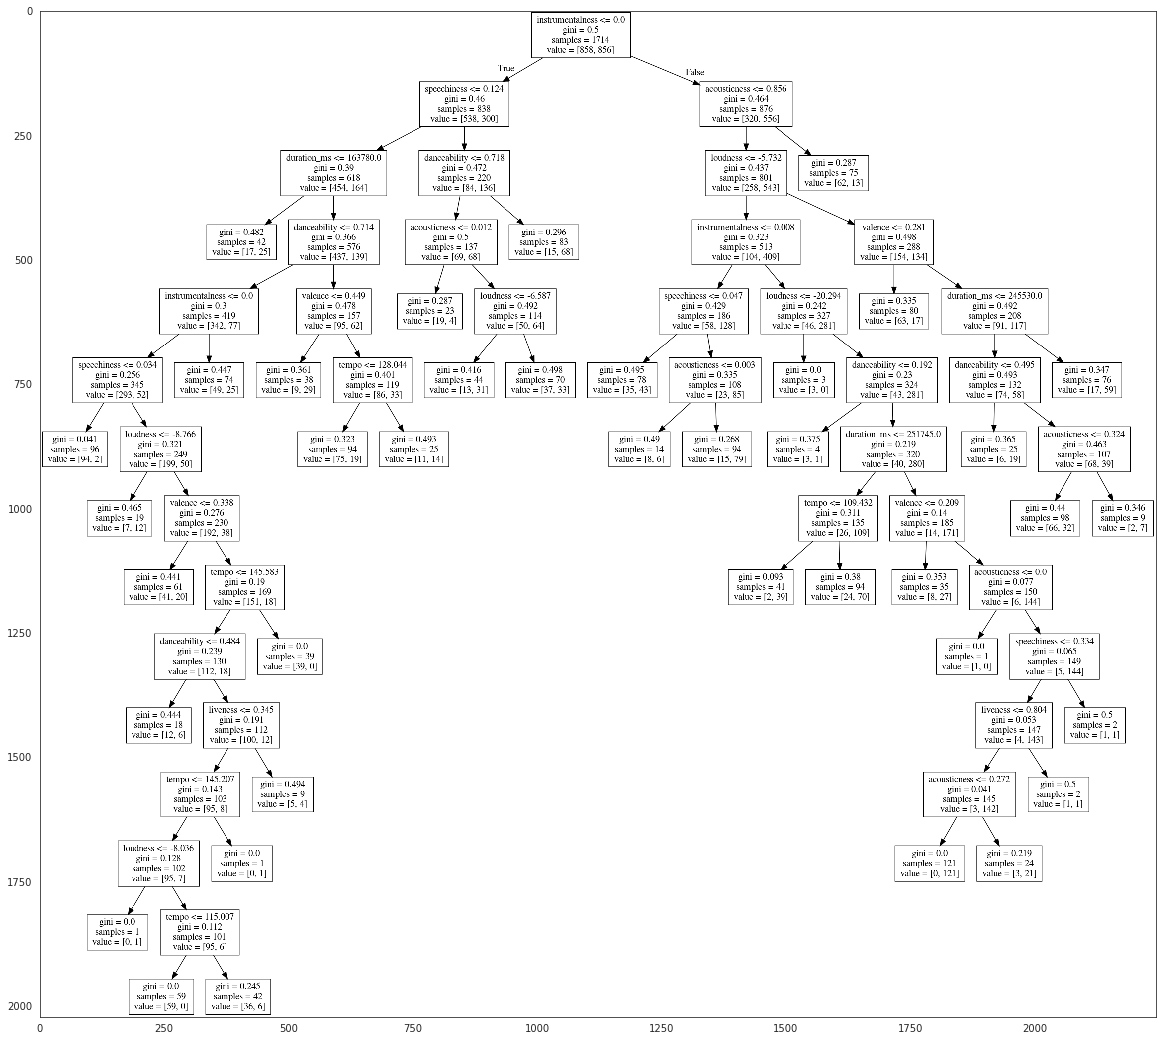

In [18]:
show_tree(dt, features, 'dec_tree_01.png')

In [19]:
y_pred = c.predict(x_test)

In [20]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,

In [21]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred) * 100

In [22]:
print("Precisão usando a arvore: ", round(score, 1), "%")

Precisão usando a arvore:  74.9 %
